In [136]:
from __future__ import print_function
import pandas as pd
import seaborn as sb
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
print(train.columns.values)

['AnimalID' 'Name' 'DateTime' 'OutcomeType' 'OutcomeSubtype' 'AnimalType'
 'SexuponOutcome' 'AgeuponOutcome' 'Breed' 'Color']


In [137]:
# Define functions:
# Strip /'s and add a column: isMix
def isMix(x):
    if x.lower().find('mix') > 0: return 'mix'
    if x.find('/') > 0: return 'pure'
    else: return 'mixUnknown'
def formatBreed(x):
    if x.lower().find('mix') > 0: return x.replace(' Mix', '')
    if x.find('/'): return x.split('/', 1)[0]
    else: return x
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'genderUnknown'
def get_neutered(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'neuteredUnknown'
# Approximates months and weeks to years
def format_age(x):
    x = str(x)
    if x.find('week') > 0: return float(re.sub('\D', '', x)) / 52
    if x.find('month') > 0: return float(re.sub('\D', '', x)) / 12
    if x.find('day') > 0: return float(re.sub('\D', '', x)) / 365
    if x.find('year') > 0: return float(re.sub('\D', '', x))
    else: return 0

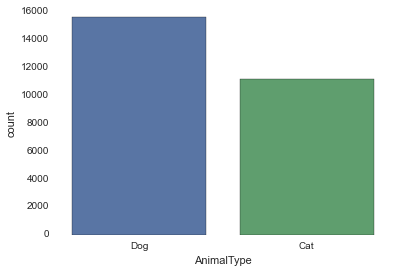

In [138]:
sb.countplot(train.AnimalType)

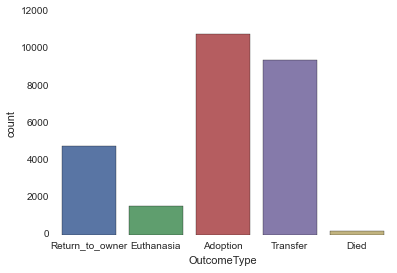

In [139]:
sb.countplot(train.OutcomeType)

KeyError: 'unknown'

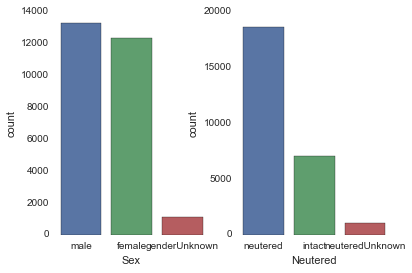

In [140]:


train['Sex'] = train.SexuponOutcome.apply(get_sex)
train['Neutered'] = train.SexuponOutcome.apply(get_neutered)
test['Sex'] = test.SexuponOutcome.apply(get_sex)
test['Neutered'] = test.SexuponOutcome.apply(get_neutered)

f, (ax1, ax2) = plt.subplots(1, 2)
sb.countplot(train.Sex, ax=ax1)
sb.countplot(train.Neutered, ax=ax2)

# Check unknowns
print(len(train.groupby('Sex').get_group('unknown')))
print(len(train.groupby('Neutered').get_group('unknown')))

In [ ]:


train['AgeInYears'] = train.AgeuponOutcome.apply(format_age)
test['AgeInYears'] = test.AgeuponOutcome.apply(format_age)

sb.distplot(train['AgeInYears'], bins = 20, kde = False)

221


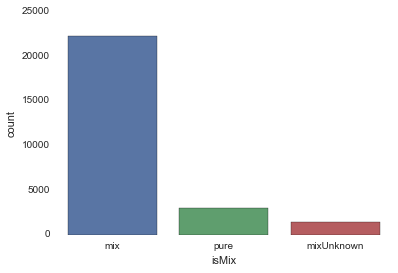

In [143]:
train['Breed_formatted'] = train.Breed.apply(formatBreed)
train['isMix'] = train.Breed.apply(isMix)
test['Breed_formatted'] = test.Breed.apply(formatBreed)
test['isMix'] = test.Breed.apply(isMix)
print(len(train.Breed_formatted.unique()))

sb.countplot(train.isMix)

In [ ]:
print(train.columns.values)

In [146]:
# Finally, produce dummies from the categorical vars:

train_cleaned = train\
    .append(pd.get_dummies(train.isMix))\
    .append(pd.get_dummies(train.Sex))\
    .append(pd.get_dummies(train.Neutered))\
    .append(pd.get_dummies(train.Breed_formatted))\
    .append(pd.get_dummies(train.OutcomeType))

test_cleaned = test\
    .append(pd.get_dummies(test.isMix))\
    .append(pd.get_dummies(test.Sex))\
    .append(pd.get_dummies(test.Neutered))\
    .append(pd.get_dummies(test.Breed_formatted))

In [142]:
train.to_csv('data/train_cleaned.csv', sep=',', encoding='utf-8')
test.to_csv('data/test_cleaned.csv', sep=',', encoding='utf-8')